# Proyecto 03 - Series de Tiempo

**github: https://github.com/jmbedini**

**Repositorio donde se encuentra el proyecto: https://github.com/jmbedini/proyect_3_TS**

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

**Mi GitHub: https://github.com/jmbedini**

**Repositorio donde se encuentra el proyecto: https://github.com/jmbedini/proyect_3_TS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set()

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [11]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [12]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [13]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


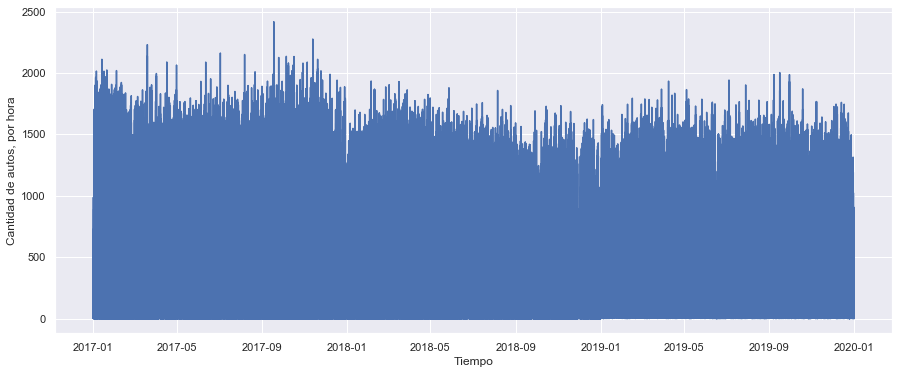

In [14]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

### Análisis Exploratorio de Datos

In [15]:
round(dataset.describe(), ndigits = 2)

,cantidad_pasos
count,238869.00
mean,200.38
std,403.25
min,1.00
25%,2.00
50%,11.00
75%,104.00
max,2416.00


Podemos notar que claramente hay valores outliers, ya que la **media** de la cantidad de vehiculos que pasan por dia es de '200.38' y la **desviación estandar** es de '403.25', siendo que el 50% de los datos se concentran en 11 pasos por dia.

##### Valores Faltantes

Hay que tener en cuenta que pueden haber **dos tipos** de valores faltantes. Uno corresponde a una fecha sin su valor de flujo vehicular (está la fecha sin su dato) y el otro corresponde a una fecha que no está (no está la fecha ni la cantidad de pasos).

En primer medida, chequeamos que no haya una fecha **sin** su valor correspondiente:

In [16]:
dataset.isna().sum()

dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
fecha             0
dtype: int64

Vemos que no existe ninguna fecha sin su valor correspondiente.

En segundo lugar, tambien chequeamos que no haya ninguna fecha faltante y el dataset esté completo.

In [17]:
diario = dataset.resample('D', on = 'fecha').sum()
diario.head()

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


In [18]:
diario.isna().sum()

cantidad_pasos    0
dtype: int64

In [19]:
check = pd.date_range(start = diario.index.min(), end = diario.index.max(), freq = 'D')
check.value_counts().sum()

1095

In [20]:
check_2 = pd.date_range(start = '01/01/2017', end = '31/12/2019', freq = 'D')
check_2.value_counts().sum()

1095

In [21]:
serie = diario.index.value_counts().sum()
serie

1095

Corroboramos con un 'date_range' (que nos devuelve una serie **completa** entre dos rangos), que nos coincide la cantidad de 'lineas de fechas' con la de nuestro dataset original.

##### ¿Cuales son los dias con mayor tráfico?

In [22]:
dataset_dia = dataset.copy()

In [23]:
#me falta saber como ordenar el groupbyde Lunes a Domingo
agrup_dia = round(dataset_dia.groupby(['dia']).sum().sort_values('cantidad_pasos', ascending=False), ndigits = 2)
agrup_dia

,cantidad_pasos
dia,
Viernes,7647272
Jueves,7302169
Miércoles,7125526
Martes,6865551
Lunes,6691387
Sábado,6441715
Domingo,5791961


El día de Mayor Tráfico son los **Viernes**.

##### ¿Cuál es el horario con mayor tráfico?

In [24]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_2 = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset_2.estacion=='Illia', dataset_2.forma_pago == 'EFECTIVO')
dataset_2 = dataset_2[mask]

#Quitamos las columnas que no vamos a utilizar
dataset_2.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset_2.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [25]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_2['fecha'] = pd.to_datetime(dataset_2.fecha)
#dataset_2['hora_fin'] = pd.to_timedelta(dataset_2.hora_fin, unit = 'h')
dataset_2.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [26]:
agrup_hora = round(dataset_2.groupby(['hora_fin']).sum(), ndigits = 2)
agrup_hora

,cantidad_pasos
hora_fin,
0,1057141
1,879116
2,614594
3,429898
4,334860
5,411330
6,781617
7,1564013
8,2276977


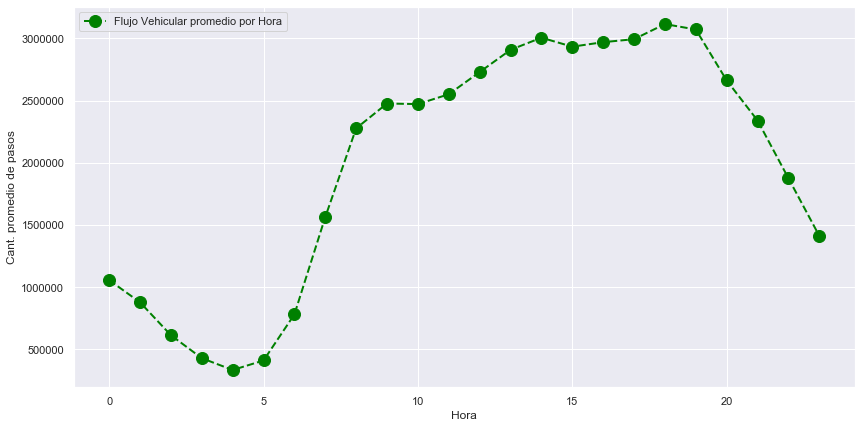

In [27]:
plt.figure(figsize = (14,7))
plt.plot(agrup_hora.index, agrup_hora.cantidad_pasos, color='green', marker='o',
         linestyle='dashed',linewidth=2, markersize=12, label = 'Flujo Vehicular promedio por Hora')
plt.xlabel('Hora')
plt.ylabel('Cant. promedio de pasos')
#plt.ylim(0,300)
plt.legend()
plt.show()

Podemos obervar que las horas de mayor tráfico, son las comunmente llamadas **"Horas Pico"**, entre las ***18 y 19hs***.

In [28]:
agrup_hora_prom = round(dataset_2.groupby(['hora_fin']).mean(), ndigits = 2)
agrup_hora_prom

,cantidad_pasos
hora_fin,
0,114.20
1,98.94
2,71.03
3,51.66
4,40.63
5,48.82
6,86.29
7,155.25
8,221.58


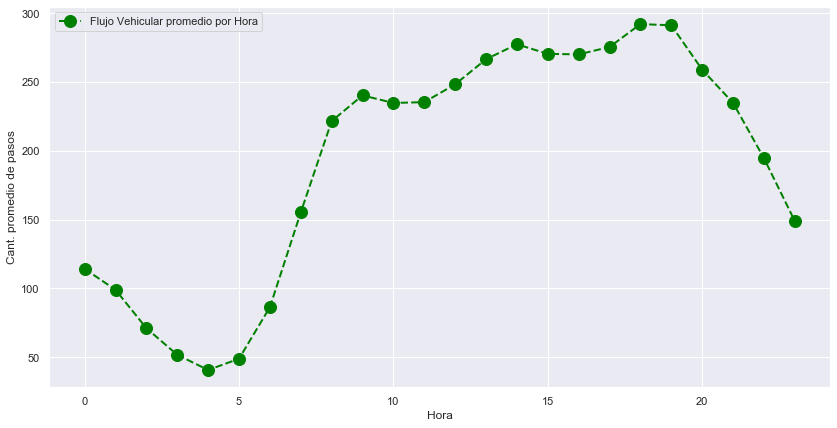

In [29]:
plt.figure(figsize = (14,7))
plt.plot(agrup_hora_prom.index, agrup_hora_prom.cantidad_pasos, color='green', marker='o',
         linestyle='dashed',linewidth=2, markersize=12, label = 'Flujo Vehicular promedio por Hora')
plt.xlabel('Hora')
plt.ylabel('Cant. promedio de pasos')
#plt.ylim(0,300)
plt.legend()
plt.show()

Tambien podemos obervar que en **promedio** el mayor tráfico, es entre las ***18 y 19hs***.

In [30]:
dataset.groupby('fecha').sum().sort_values('cantidad_pasos', ascending=False)

,cantidad_pasos
fecha,
2017-10-05 18:00:00,4412
2017-11-17 14:00:00,4375
2017-12-07 16:00:00,4369
2017-10-13 15:00:00,4331
2017-11-24 15:00:00,4206
...,...
2019-02-11 21:00:00,3
2017-12-24 00:00:00,3
2017-01-01 01:00:00,1


A las **18:00hs del 05/10/2017**, fue el dia y hora de mayor pasadas por el peaje Illia.

### Autocorrelaciones

In [157]:
semanal = dataset.resample('W', on = 'fecha').mean()
print(semanal.shape)
semanal.head()

(158, 1)


,cantidad_pasos
fecha,
2017-01-01,134.991342
2017-01-08,159.344654
2017-01-15,168.002293
2017-01-22,162.963047
2017-01-29,161.540319


In [158]:
from statsmodels.tsa.stattools import acf

In [159]:
nlags =  52*3
autocorr = acf(semanal.cantidad_pasos, nlags = nlags)

C:\Users\Toshiba\anaconda3\envs\Data_Science\lib\site-packages\statsmodels\tsa\stattools.py:666: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


In [160]:
autocorr

array([ 1.        ,  0.97858099,  0.95643107,  0.93428968,  0.91170132,
        0.88575595,  0.86278531,  0.83895736,  0.81300191,  0.78753953,
        0.76231153,  0.73761209,  0.71343434,  0.6842744 ,  0.65830463,
        0.63421155,  0.60999968,  0.58501062,  0.56484776,  0.53989304,
        0.5161399 ,  0.49218031,  0.46746409,  0.43955056,  0.41823731,
        0.39922578,  0.37492411,  0.35207071,  0.32817606,  0.30500018,
        0.28003038,  0.25361865,  0.23167609,  0.20899979,  0.1885119 ,
        0.16488628,  0.14461459,  0.12440841,  0.10339242,  0.07884053,
        0.05753758,  0.03774405,  0.01764127, -0.00420346, -0.02518296,
       -0.04743127, -0.06899813, -0.08873906, -0.10861888, -0.12930139,
       -0.14966265, -0.17032837, -0.18185036, -0.18820771, -0.18969238,
       -0.19110757, -0.19080143, -0.19027286, -0.18920027, -0.18731449,
       -0.18696178, -0.18679502, -0.18520051, -0.18576016, -0.18383461,
       -0.18120043, -0.17891959, -0.17769526, -0.17575019, -0.17

In [161]:
autocorr.shape

(157,)

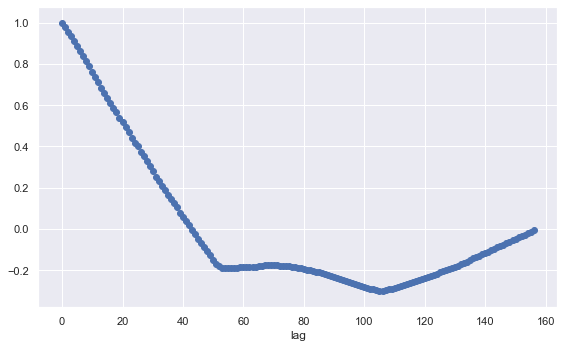

In [168]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')
plt.tight_layout()

Observamos que el primer dato es igual a 1, ya que es la correlación de la serie consigo misma **sin lags** (sin desplazamiento).

<Figure size 720x360 with 0 Axes>

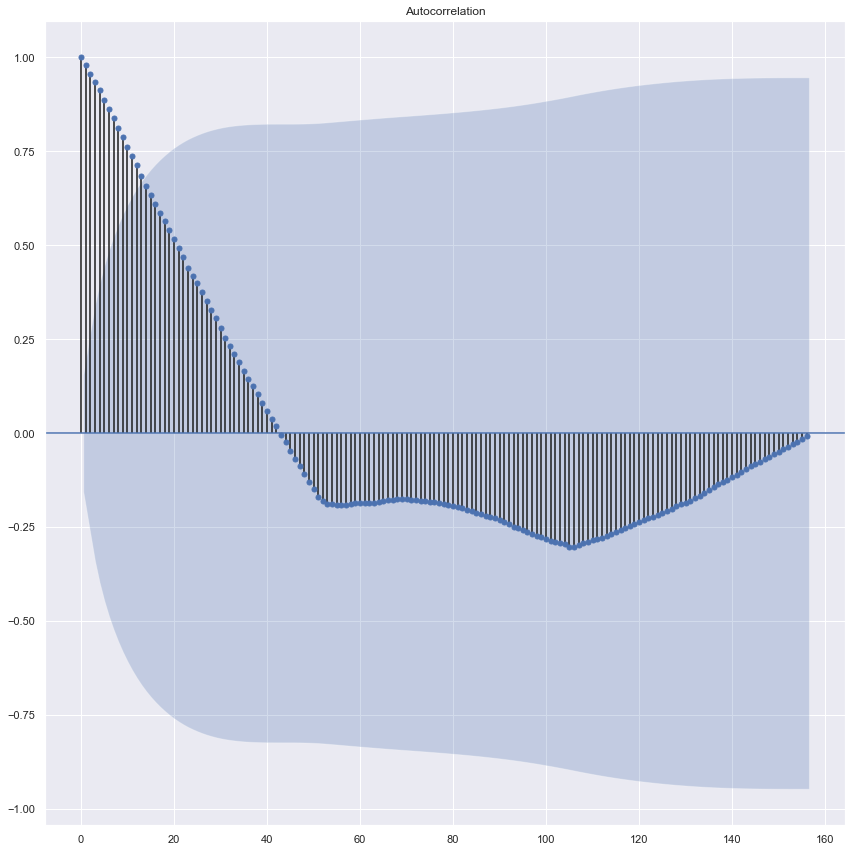

In [169]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (10,5))
plot_acf(semanal.cantidad_pasos, lags = nlags)
plt.tight_layout()
plt.show()

##### Primeras conclusiones:
Es de esperarse que a medida que a medida que pasen las semanas y se vaya desplazando la serie, **la autocorrelación vaya disminuyendo** hasta cumplir un ciclo (52). Lo que podemos notar es que cuando vuelven a empezar el ciclo, la autocorrelación **no tiene la misma fuerza**. 
Si nos fijamos en el segundo gráfico, el **intervalo de confianza** es cada vez mas grande (que es la zona sombreada) y termina abarcando todos los datos, lo cual quiere decir que no tienen ninguna relevancia y no aportan a la hora de predecir el futuro.
Esto puede deberse a varios factores, como por ejemplo que **empiece a migrar el pago del efectivo al Telepase** (acá solo tomamos 'EFECTIVO')
Más adelante vamos a analizarlos juntos con los componentes de la serie.

### Valores Atípicos

Para buscar los valores atípicos vamos a utilizar el dataset que contiene la forma de pago tanto en 'Efectivo' como por 'Telepase', ya que me parece que este tiene mas consistencia y más relevancia para lo que queremos estudiar.

Vamos a proceder a resamplearlo en el término de 'días' para poder detectar visualmente de mejor forma los outliers (más allá del gráfico de boxplot).

In [38]:
data = dataset.copy()

In [39]:
data = data.resample('D', on = 'fecha').sum()
data.head()

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


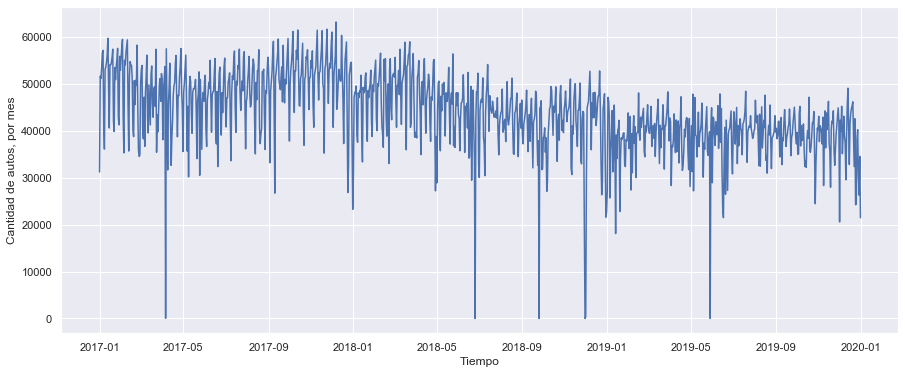

In [40]:
plt.figure(figsize = (15,6))
plt.plot(data.index, data.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.show()

Text(0.5, 0, 'Flujo Vehicular')

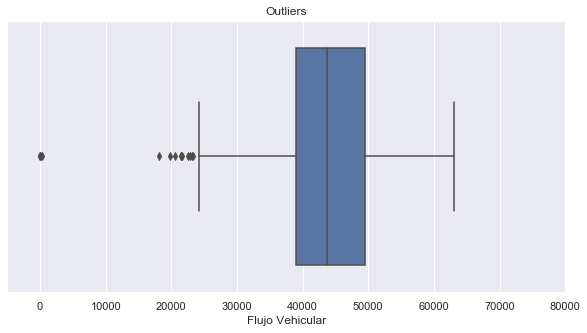

In [41]:
plt.figure(figsize = (10,5))
sns.boxplot(data = data, x = "cantidad_pasos")
plt.xlim(-5000,80000)
plt.title("Outliers")
plt.xlabel("Flujo Vehicular")

Viendo ambos gráficos podemos notar que existen outliers en los que debemos trabajar para no distorsionar nuestro análisis sobre el dataset. Como la disposición de los datos esta sesgada hacia la derecha, el mejor método para poder identificarlos es el del **IQR**.

In [42]:
Q1 = data['cantidad_pasos'].quantile(0.25)
Q3 = data['cantidad_pasos'].quantile(0.75)
IQR = Q3 - Q1 #Rango intercuartílico

limite_inf = (Q1) - (1.5 * IQR)
limite_sup = (Q3) + (1.5 * IQR)

print(Q1, Q3, IQR)
print("Límite Inferior: " + str(limite_inf))
print("Límite Superior: " + str(limite_sup))

39061.5 49498.0 10436.5
Límite Inferior: 23406.75
Límite Superior: 65152.75


Claramente como lo muestran los gráficos y los límites que marcan el método de IQR, aquellos valores por debajo de 23.406 pasos de vehiculos podemos considerarlos como outliers. Como en una serie de tiempo no podemos eliminar los registros para que nuestra serie cuente con todos los datos equiespaciados, vamos a proceder a transformarlos en NAN y rellenarlos con la función 'interpolate'.

In [43]:
data.cantidad_pasos[data.cantidad_pasos < limite_inf] = np.nan
data.cantidad_pasos[data.cantidad_pasos > limite_sup] = np.nan

In [44]:
print(data.isna().sum())

cantidad_pasos    16
dtype: int64


In [45]:
data = data.interpolate() #interpotlate lo que hace es rellenar los NA
print(data.isna().sum())

cantidad_pasos    0
dtype: int64


Chequeamos quen nuestro bloxplot no figuren outliers:

Text(0.5, 0, 'Flujo Vehicular')

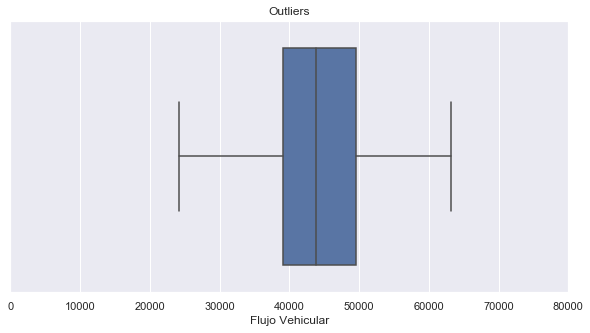

In [46]:
plt.figure(figsize = (10,5))
sns.boxplot(data = data, x = "cantidad_pasos")
plt.xlim(0,80000)
plt.title("Outliers")
plt.xlabel("Flujo Vehicular")

### Componentes de la serie

Analizando el gráfico del dataset tal cual está (**frecuencia horaria por día** en un lapso de 3 años), podemos notar que existe una **tendencia negativa**, aunque no es del todo visible.

In [47]:
dataset_tend = data.copy()

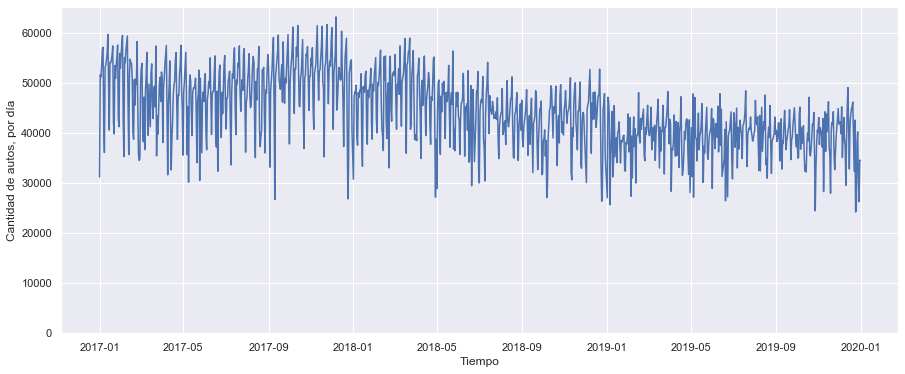

In [48]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset_tend.index, dataset_tend.cantidad_pasos)
plt.ylim(0)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por día')
plt.show()

Vamos a obtener los **componentes de la serie** con la librería $Statsmodels$.

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [50]:
result = seasonal_decompose(dataset_tend.cantidad_pasos, model='additive')

In [51]:
result.trend

fecha
2017-01-01             NaN
2017-01-02             NaN
2017-01-03             NaN
2017-01-04    48904.285714
2017-01-05    49601.714286
                  ...     
2019-12-27    31197.428571
2019-12-28    32669.285714
2019-12-29             NaN
2019-12-30             NaN
2019-12-31             NaN
Freq: D, Name: trend, Length: 1095, dtype: float64

In [52]:
result.seasonal

fecha
2017-01-01   -6646.321063
2017-01-02   -1110.020909
2017-01-03      11.358507
2017-01-04    1833.212327
2017-01-05    3199.069241
                 ...     
2019-12-27    5175.715074
2019-12-28   -2463.013177
2019-12-29   -6646.321063
2019-12-30   -1110.020909
2019-12-31      11.358507
Freq: D, Name: seasonal, Length: 1095, dtype: float64

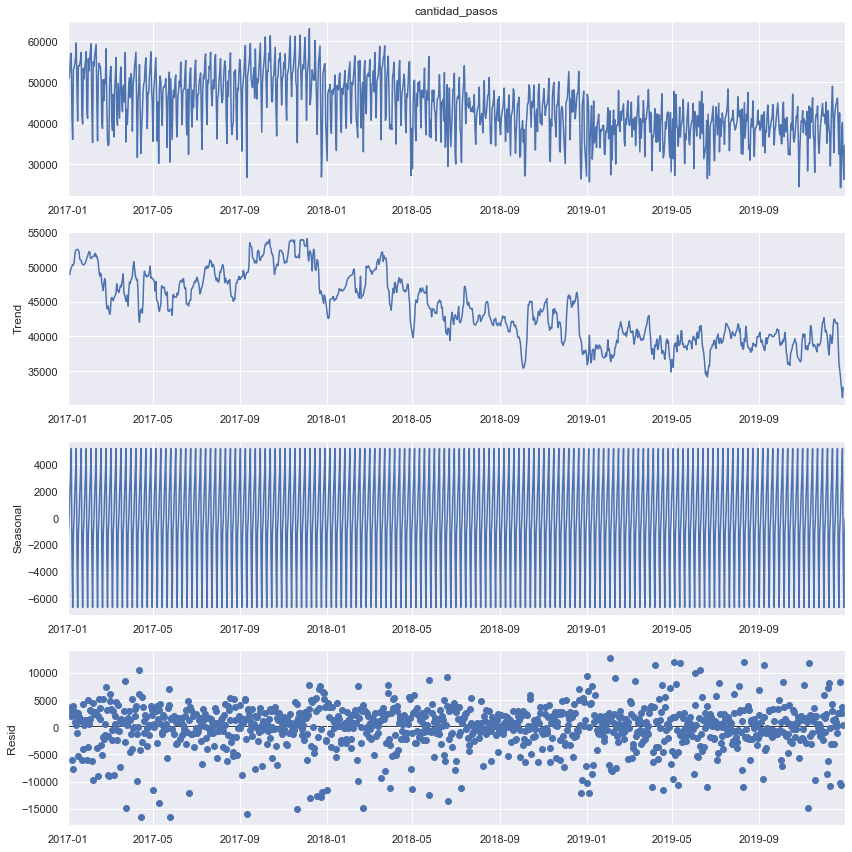

In [53]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

##### Histograma Residual

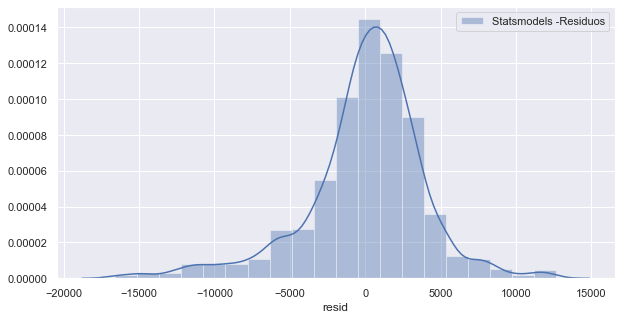

In [171]:
plt.figure(figsize = (10,5))
sns.distplot(result.resid, bins=20, label="Statsmodels -Residuos")

plt.legend()
plt.show()

##### Comentarios:
En el primer gráfico podemos ver que en los **datos observados** se muestra ya una **tendencia negativa**  en cuanto al tráfico vehicular con metodo de pago **"Efectivo"** (tal cual lo está indicando nuestro segundo gráfico).
Claramente en nuestro 3er gráfico se nota una **estacionalidad** en nuestra serie. 
Con respecto al **ruido**, representa un comportamiento estable y parejo en el tiempo (tratandose de **ruido blanco**), apto para porder modelar. 

Para corroborar si la tendencia negativa se da en general en nuestro data set o es cuestión de una variable en particular, vamos a realizar el mismo análisis pero teniendo en cunta la forma de pago por **"Telepase"**.

In [54]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_3 = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Telepase
mask = np.logical_and(dataset_3.estacion=='Illia', dataset_3.forma_pago == 'TELEPASE')
dataset_3 = dataset_3[mask]

#Quitamos las columnas que no vamos a utilizar
dataset_3.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset_3.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
20,2019-01-01,1,Martes,Centro,Liviano,59
21,2019-01-01,1,Martes,Centro,Pesado,1
23,2019-01-01,1,Martes,Provincia,Liviano,106
25,2019-01-01,1,Martes,Provincia,Pesado,2
85,2019-01-01,2,Martes,Centro,Liviano,507


In [55]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_3['fecha'] = pd.to_datetime(dataset_3.fecha)
dataset_3.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
20,2019-01-01,1,Martes,Centro,Liviano,59
21,2019-01-01,1,Martes,Centro,Pesado,1
23,2019-01-01,1,Martes,Provincia,Liviano,106
25,2019-01-01,1,Martes,Provincia,Pesado,2
85,2019-01-01,2,Martes,Centro,Liviano,507


In [56]:
dataset_telepase = dataset_3.copy()

In [57]:
dataset_telepase = dataset_telepase.resample('D', on = 'fecha').sum()
dataset_telepase.head()

,hora_fin,cantidad_pasos
fecha,,
2017-01-01,1774,12326
2017-01-02,2760,35621
2017-01-03,2615,39390
2017-01-04,2542,40294
2017-01-05,2814,41373


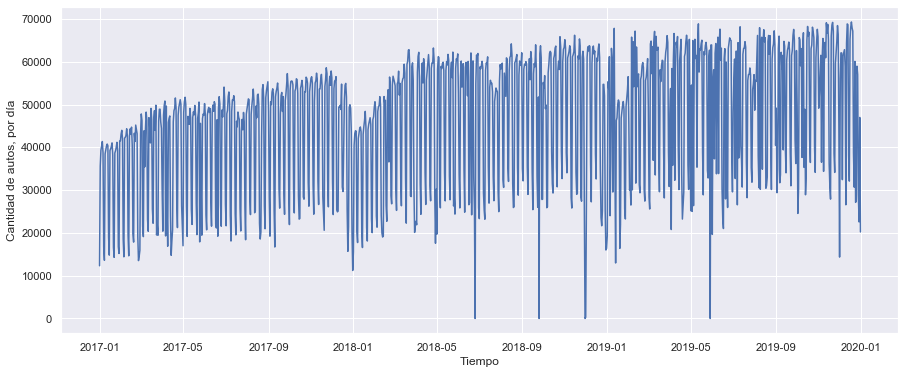

In [58]:
plt.figure(figsize = (15,6))
plt.plot(dataset_telepase.index, dataset_telepase.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por día')
plt.show()

Vamos a trabajar los **valores atípicos** tambien para que no nos distorsione el análisis.

In [59]:
dataset_telepase.cantidad_pasos[dataset_telepase.cantidad_pasos < 10000] = np.nan

In [60]:
print(dataset_telepase.isna().sum())

hora_fin          0
cantidad_pasos    5
dtype: int64


In [61]:
dataset_telepase = dataset_telepase.interpolate() #interpotlate lo que hace es rellenar los NA
print(dataset_telepase.isna().sum())

hora_fin          0
cantidad_pasos    0
dtype: int64


Continuamos con la **descomposicion** de la series:

In [62]:
result_2 = seasonal_decompose(dataset_telepase.cantidad_pasos, model='additive')

In [63]:
result_2.trend

fecha
2017-01-01             NaN
2017-01-02             NaN
2017-01-03             NaN
2017-01-04    32063.000000
2017-01-05    32245.142857
                  ...     
2019-12-27    38469.428571
2019-12-28    37481.428571
2019-12-29             NaN
2019-12-30             NaN
2019-12-31             NaN
Freq: D, Name: trend, Length: 1095, dtype: float64

In [64]:
result_2.seasonal

fecha
2017-01-01   -18290.863539
2017-01-02     2380.595447
2017-01-03     6362.430009
2017-01-04     7927.591503
2017-01-05     9087.784269
                  ...     
2019-12-27     6327.328835
2019-12-28   -13794.866525
2019-12-29   -18290.863539
2019-12-30     2380.595447
2019-12-31     6362.430009
Freq: D, Name: seasonal, Length: 1095, dtype: float64

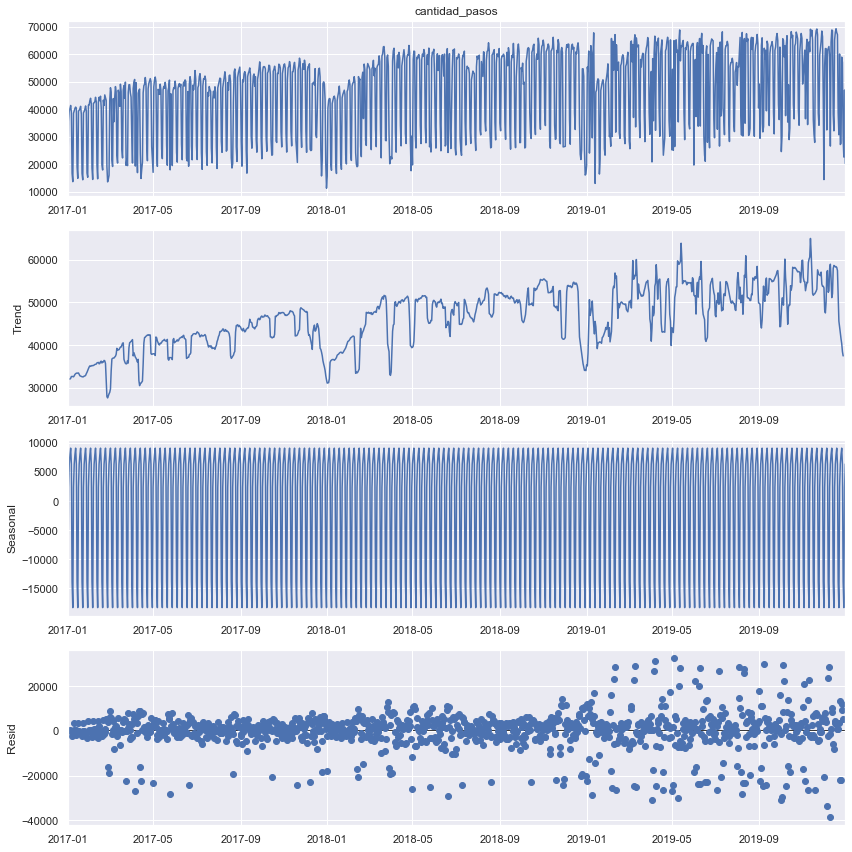

In [65]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result_2.plot()
plt.show()

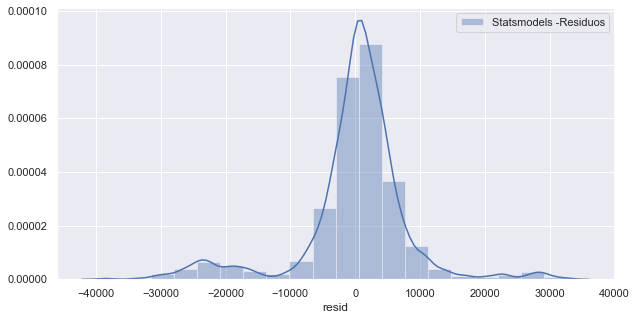

In [172]:
plt.figure(figsize = (10,5))
sns.distplot(result_2.resid, bins=20, label="Statsmodels -Residuos")

plt.legend()
plt.show()

#### Comentarios:
Claramente vemos un **cambio en la tendencia (positiva - ascendente)** de nuestros datos tomando como método de pago el **"Telepase"**.

Para terminar de chequear nuestros datos a grandes rasgos, vamos a tomar estas **dos formas de pago juntas (Telepase + Efectivo)** y vamos a observar como se comportan nuestros datos.

In [66]:
dataset_4 = pd.concat([data_2019, data_2018, data_2017])

In [67]:
dataset_unido = dataset_4.loc[((dataset_4["forma_pago"] == "EFECTIVO") |
                (dataset_4["forma_pago"] == "TELEPASE")) &
                (dataset_4["estacion"] == "Illia")]

In [68]:
dataset_unido.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset_unido.head()

C:\Users\Toshiba\anaconda3\envs\Data_Science\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
20,2019-01-01,1,Martes,Centro,Liviano,59
21,2019-01-01,1,Martes,Centro,Pesado,1
23,2019-01-01,1,Martes,Provincia,Liviano,106
25,2019-01-01,1,Martes,Provincia,Pesado,2
80,2019-01-01,2,Martes,Centro,Liviano,537


In [69]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_unido['fecha'] = pd.to_datetime(dataset_unido.fecha)
dataset_unido.head()

C:\Users\Toshiba\anaconda3\envs\Data_Science\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
20,2019-01-01,1,Martes,Centro,Liviano,59
21,2019-01-01,1,Martes,Centro,Pesado,1
23,2019-01-01,1,Martes,Provincia,Liviano,106
25,2019-01-01,1,Martes,Provincia,Pesado,2
80,2019-01-01,2,Martes,Centro,Liviano,537


In [70]:
dataset_unido.shape

(443481, 6)

In [71]:
tend_unido = dataset_unido.resample('D', on = 'fecha').sum()
tend_unido.head()

,hora_fin,cantidad_pasos
fecha,,
2017-01-01,4750,43509
2017-01-02,6473,87189
2017-01-03,6188,90483
2017-01-04,6451,93626
2017-01-05,6634,97859


Antes de seguir con nuesta descomposición, vamos a volver trabajar con nuestros **outliers**.

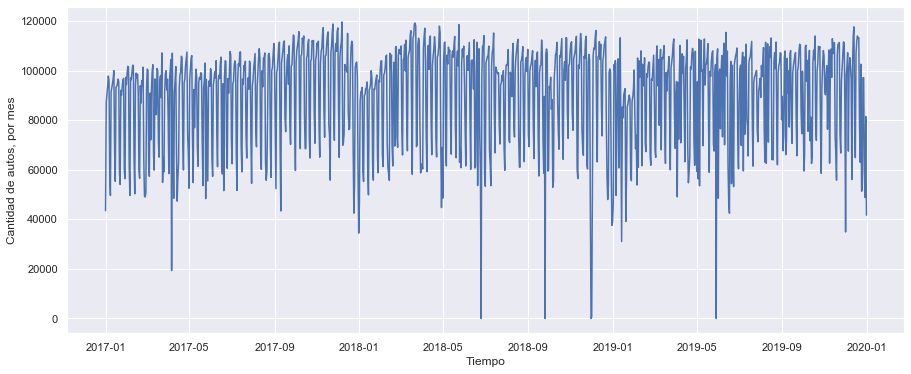

In [72]:
plt.figure(figsize = (15,6))
plt.plot(tend_unido.index, tend_unido.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.show()

Text(0.5, 0, 'Flujo Vehicular')

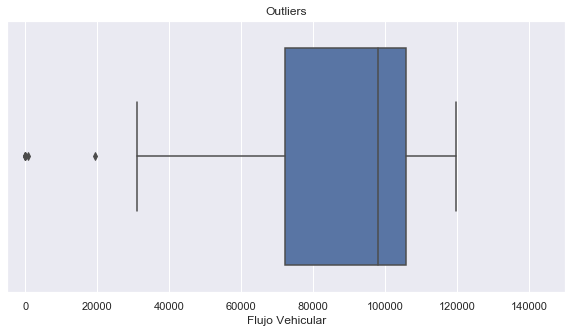

In [73]:
plt.figure(figsize = (10,5))
sns.boxplot(data = tend_unido, x = "cantidad_pasos")
plt.xlim(-5000,150000)
plt.title("Outliers")
plt.xlabel("Flujo Vehicular")

Viendo ambos gráficos podemos notar que existen outliers en los que debemos trabajar para no distorsionar nuestro análisis sobre el dataset. Como la disposición de los datos esta sesgada hacia la derecha, el mejor método para poder identificarlos es el del IQR.

In [74]:
Q1 = tend_unido['cantidad_pasos'].quantile(0.25)
Q3 = tend_unido['cantidad_pasos'].quantile(0.75)
IQR = Q3 - Q1 #Rango intercuartílico

limite_inf = (Q1) - (1.5 * IQR)
limite_sup = (Q3) + (1.5 * IQR)

print(Q1, Q3, IQR)
print("Límite Inferior: " + str(limite_inf))
print("Límite Superior: " + str(limite_sup))

72269.5 105722.5 33453.0
Límite Inferior: 22090.0
Límite Superior: 155902.0


Claramente como lo muestran los gráficos y los límites que marcan el método de IQR, aquellos valores por debajo de 22.090 pasos de vehiculos podemos considerarlos como outliers. Como en una serie de tiempo no podemos eliminar los registros para que nuestra serie cuente con todos los datos equiespaciados, vamos a proceder a transformarlos en NAN y rellenarlos con la función 'interpolate'.

In [75]:
tend_unido.cantidad_pasos[tend_unido.cantidad_pasos < limite_inf] = np.nan
tend_unido.cantidad_pasos[tend_unido.cantidad_pasos > limite_sup] = np.nan

In [76]:
print(tend_unido.isna().sum())

hora_fin          0
cantidad_pasos    6
dtype: int64


In [77]:
tend_unido = tend_unido.interpolate() #interpotlate lo que hace es rellenar los NA
print(tend_unido.isna().sum())

hora_fin          0
cantidad_pasos    0
dtype: int64



Chequeamos quen nuestro bloxplot no figuren outliers:

Text(0.5, 0, 'Flujo Vehicular')

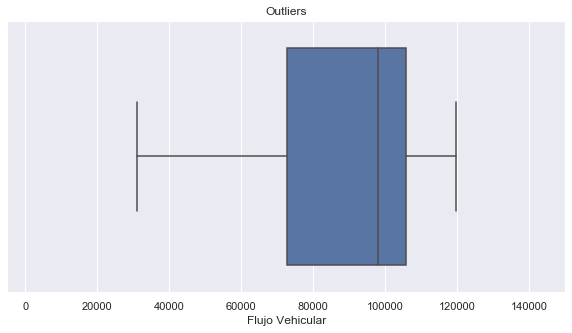

In [78]:
plt.figure(figsize = (10,5))
sns.boxplot(data = tend_unido, x = "cantidad_pasos")
plt.xlim(-5000,150000)
plt.title("Outliers")
plt.xlabel("Flujo Vehicular")

In [79]:
result_unido_2 = seasonal_decompose(tend_unido.cantidad_pasos, model='additive')

In [80]:
result_unido_2.trend

fecha
2017-01-01             NaN
2017-01-02             NaN
2017-01-03             NaN
2017-01-04    80967.285714
2017-01-05    81846.857143
                  ...     
2019-12-27    69666.857143
2019-12-28    68282.714286
2019-12-29             NaN
2019-12-30             NaN
2019-12-31             NaN
Freq: D, Name: trend, Length: 1095, dtype: float64

In [81]:
result_unido_2.seasonal

fecha
2017-01-01   -25300.379634
2017-01-02     1253.055850
2017-01-03     6480.801012
2017-01-04     9867.120963
2017-01-05    12459.720322
                  ...     
2019-12-27    11521.396299
2019-12-28   -16281.714812
2019-12-29   -25300.379634
2019-12-30     1253.055850
2019-12-31     6480.801012
Freq: D, Name: seasonal, Length: 1095, dtype: float64

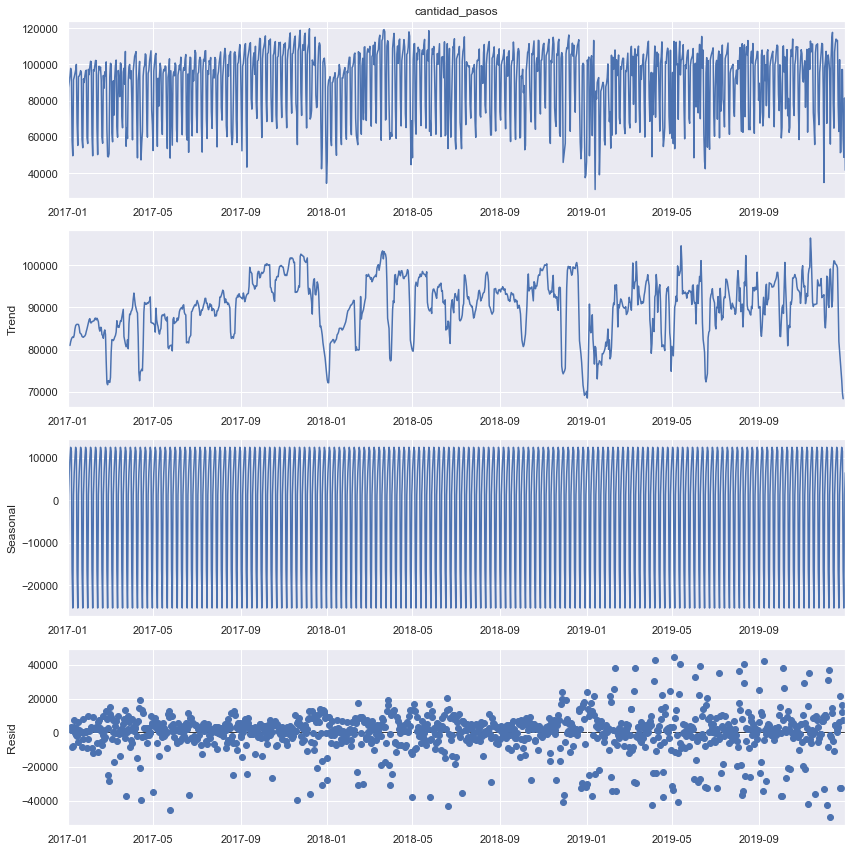

In [82]:
matplotlib.rcParams['figure.figsize'] = [12,12]
result_unido_2.plot()
plt.show()

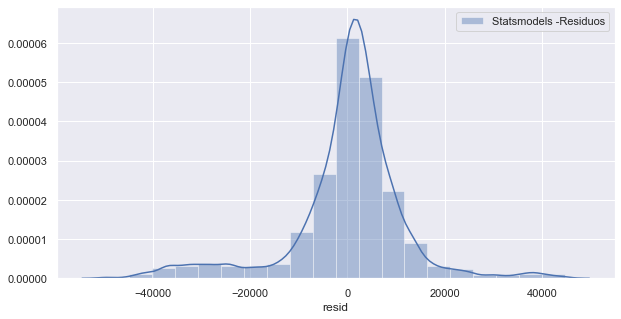

In [173]:
plt.figure(figsize = (10,5))
sns.distplot(result_unido_2.resid, bins=20, label="Statsmodels -Residuos")

plt.legend()
plt.show()

#### Comentarios:
Ya tomando los dos tipos de pago más usados (en efectivo y por telepase), podemos ver que los datos obersavados ya se comportan de una manera **más constante** en el tiempo. 

Viendo los componentes de la serie tomados de haber **resampleado por 'día'** podemos concluir que:

- No hay una **tendencia clara**, mas bien diría que es estable o flat.
- Se ve una clara **estacionalidad** que se repite a lo largo de la serie.
- Si bien podemos decir que ya estamos cerca de visualizar **ruido blanco**, notamos que hay algunas distorsiones
  adentrandonos en el año 2019.

### Parte B - Modelo de Machine Learning

Vamos a trabajar nuestro modelo de Machine Learning, basandonos en los años **2017,2018 y 2019** en la Estación de Peaje **Illia** y con las **2 formas de Pago que mayor flujo Vehicular tienen (Efectivo y Telepase)** para poder **predecir el tráfico en la autopista Illia para el último trimestre del 2019.**

In [83]:
data_ML = pd.concat([data_2019, data_2018, data_2017])

mask = data_ML.estacion =='Illia'
forma_pago = data_ML[mask]

forma_pago.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
19,2019,2019-01-01,0,1,Martes,Illia,Centro,Liviano,NO COBRADO,146
20,2019,2019-01-01,0,1,Martes,Illia,Centro,Liviano,TELEPASE,59
21,2019,2019-01-01,0,1,Martes,Illia,Centro,Pesado,TELEPASE,1
22,2019,2019-01-01,0,1,Martes,Illia,Provincia,Liviano,NO COBRADO,147
23,2019,2019-01-01,0,1,Martes,Illia,Provincia,Liviano,TELEPASE,106


In [84]:
forma_pago = forma_pago.loc[:, ['forma_pago' ,'cantidad_pasos']]
forma_pago.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending=False)

,cantidad_pasos
forma_pago,
TELEPASE,50526078
EFECTIVO,47865581
NO COBRADO,2328340
EXENTO,642523
TARJETA DISCAPACIDAD,391600
INFRACCION,340809
T. DISCAPACIDAD,120842
MONEDERO,16


In [85]:
data_ML = data_ML.loc[((data_ML["forma_pago"] == "EFECTIVO") |
                       (data_ML["forma_pago"] == "TELEPASE")) &
                       (data_ML["estacion"] == "Illia")]

In [86]:
data_ML.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
20,2019,2019-01-01,0,1,Martes,Illia,Centro,Liviano,TELEPASE,59
21,2019,2019-01-01,0,1,Martes,Illia,Centro,Pesado,TELEPASE,1
23,2019,2019-01-01,0,1,Martes,Illia,Provincia,Liviano,TELEPASE,106
25,2019,2019-01-01,0,1,Martes,Illia,Provincia,Pesado,TELEPASE,2
80,2019,2019-01-01,1,2,Martes,Illia,Centro,Liviano,EFECTIVO,537


In [87]:
data_ML.drop(columns = ['periodo','hora_inicio','hora_fin','estacion'], inplace = True)

data_ML.head()

,fecha,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
20,2019-01-01,Martes,Centro,Liviano,TELEPASE,59
21,2019-01-01,Martes,Centro,Pesado,TELEPASE,1
23,2019-01-01,Martes,Provincia,Liviano,TELEPASE,106
25,2019-01-01,Martes,Provincia,Pesado,TELEPASE,2
80,2019-01-01,Martes,Centro,Liviano,EFECTIVO,537


In [88]:
data_ML['fecha'] = pd.to_datetime(data_ML.fecha)
data_ML.head()

,fecha,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
20,2019-01-01,Martes,Centro,Liviano,TELEPASE,59
21,2019-01-01,Martes,Centro,Pesado,TELEPASE,1
23,2019-01-01,Martes,Provincia,Liviano,TELEPASE,106
25,2019-01-01,Martes,Provincia,Pesado,TELEPASE,2
80,2019-01-01,Martes,Centro,Liviano,EFECTIVO,537


### Valores atípicos
A continuación identificamos y trabajamos sobre nuestros outliers para que no distorsionen nuestro análisis.

In [177]:
dataset_ML = data_ML.copy()

In [178]:
dataset_ML = dataset_ML.resample('D', on = 'fecha').sum()
dataset_ML.head()

,cantidad_pasos
fecha,
2017-01-01,43509
2017-01-02,87189
2017-01-03,90483
2017-01-04,93626
2017-01-05,97859


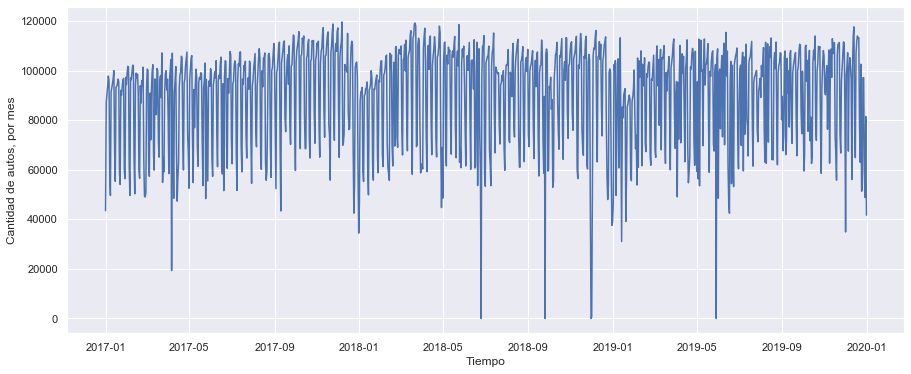

In [179]:
plt.figure(figsize = (15,6))
plt.plot(dataset_ML.index, dataset_ML.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.show()

Text(0.5, 0, 'Flujo Vehicular')

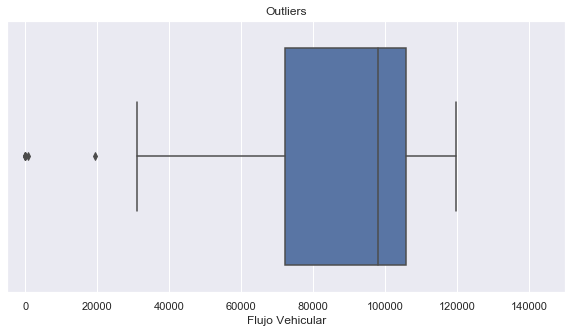

In [180]:
plt.figure(figsize = (10,5))
sns.boxplot(data = dataset_ML, x = "cantidad_pasos")
plt.xlim(-5000,150000)
plt.title("Outliers")
plt.xlabel("Flujo Vehicular")

In [181]:
Q1 = dataset_ML['cantidad_pasos'].quantile(0.25)
Q3 = dataset_ML['cantidad_pasos'].quantile(0.75)
IQR = Q3 - Q1 #Rango intercuartílico

limite_inf = (Q1) - (1.5 * IQR)
limite_sup = (Q3) + (1.5 * IQR)

print(Q1, Q3, IQR)
print("Límite Inferior: " + str(limite_inf))
print("Límite Superior: " + str(limite_sup))

72269.5 105722.5 33453.0
Límite Inferior: 22090.0
Límite Superior: 155902.0


In [182]:
dataset_ML.cantidad_pasos[dataset_ML.cantidad_pasos < limite_inf] = np.nan
dataset_ML.cantidad_pasos[dataset_ML.cantidad_pasos > limite_sup] = np.nan

In [183]:
print(dataset_ML.isna().sum())

cantidad_pasos    6
dtype: int64


In [184]:
dataset_ML = dataset_ML.interpolate() #interpotlate lo que hace es rellenar los NA
print(dataset_ML.isna().sum())

cantidad_pasos    0
dtype: int64


Text(0.5, 0, 'Flujo Vehicular')

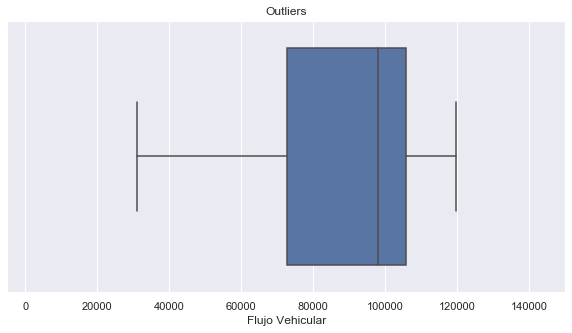

In [185]:
plt.figure(figsize = (10,5))
sns.boxplot(data = dataset_ML, x = "cantidad_pasos")
plt.xlim(-5000,150000)
plt.title("Outliers")
plt.xlabel("Flujo Vehicular")

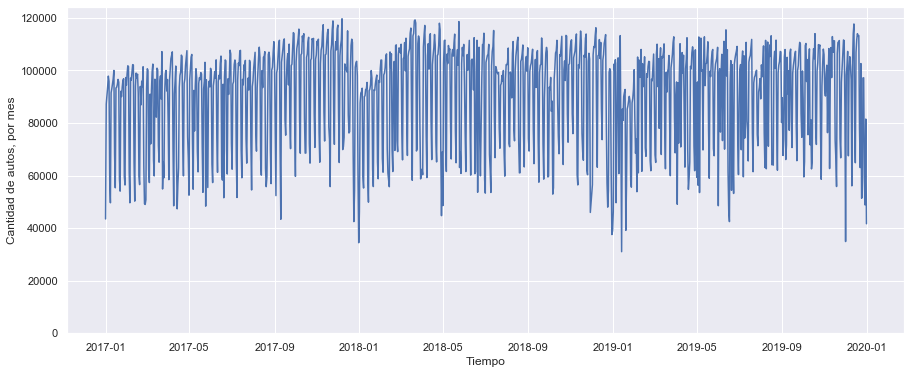

In [186]:
plt.figure(figsize = (15,6))
plt.plot(dataset_ML.index, dataset_ML.cantidad_pasos)
plt.ylim(0)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.show()

#### Modelo Benchmark  (Regresión Lineal)

En $Series de Tiempo$ para poder utilizar modelos de Regresión de aprendizaje **Supervisado**, debemos 'romper' la temporalidad de la misma.

Además, los datos son dependientes del tiempo por lo que rompe con el requerimiento que tiene la regresión lineal de que sus observaciones sean independientes.

Es por esto que vamos a utilizar la estretegia del **"ONE-STEP PREDICTION"**.

Para predecir el tráfico del último trimestre de 2019 utilizaremos los **dos primeros años** para entrenar, **10 meses** para evaluar y **1 año** para Testeo.

In [196]:
data_RL = dataset_ML.copy()
data_RL = data_RL.reset_index()
print(data_RL.shape)
data_RL.head()

(1095, 2)


,fecha,cantidad_pasos
0,2017-01-01,43509.0
1,2017-01-02,87189.0
2,2017-01-03,90483.0
3,2017-01-04,93626.0
4,2017-01-05,97859.0


Resampleamos nuestro Dataset en **semanas** para trabajarlo.

In [197]:
data_RL_semanal = data_RL.resample('W', on = 'fecha').mean()
print(data_RL_semanal.shape)
data_RL_semanal.head()

(158, 1)


,cantidad_pasos
fecha,
2017-01-01,43509.000000
2017-01-08,81846.857143
2017-01-15,85667.714286
2017-01-22,83792.000000
2017-01-29,83573.285714


In [198]:
senial = data_RL_semanal.cantidad_pasos
print(senial.shape)
senial.head()

(158,)


fecha
2017-01-01    43509.000000
2017-01-08    81846.857143
2017-01-15    85667.714286
2017-01-22    83792.000000
2017-01-29    83573.285714
Freq: W-SUN, Name: cantidad_pasos, dtype: float64

- ¿Porque tenemos 158 semanas, cuando en realidad deberian de ser 156?(3 años * 52 semanas cada año)*
     
       
- Investigando por fuera del Dataset sobre la cantidad de semanas que registroó cada año, el 2017 es el **único** año que termina su última semana del año el 31 de Diciembre. Por otro lado , el año 2018 y 2019 terminan su "ultima semana" el 30 y 29 de Diciembre, respectivamente. Por lo que a cada año, se le agrega una semana mas para poder tomar todas las fechas hasta el 31 de Diciembre. Por esto es que nos encontramos con 2 semanas mas de datos de las que deberia de haber. 1 mas por el año 2018 y 1 mas por el año 2019.

En primer lugar, debemos definir cuántos valores *hacia atrás* tomaremos.

In [199]:
look_back = 40 # usamos 10 meses para evaluar

Creamos los `X` e `y` con ceros para luego llenar con los datos. 

In [200]:
N = senial.shape[0]
print(N)

158


In [201]:
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(117, 40) (117,)


Llenamos los `X` e `y`

In [202]:
for i in range(X.shape[0]):
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [203]:
print(X)

[[ 43509.          81846.85714286  85667.71428571 ...  99559.28571429
   94366.28571429  97040.71428571]
 [ 81846.85714286  85667.71428571  83792.         ...  94366.28571429
   97040.71428571  99861.57142857]
 [ 85667.71428571  83792.          83573.28571429 ...  97040.71428571
   99861.57142857 100174.71428571]
 ...
 [100583.28571429  90618.57142857  91007.14285714 ...  90878.71428571
   92336.14285714  97441.71428571]
 [ 90618.57142857  91007.14285714  97808.14285714 ...  92336.14285714
   97441.71428571  90113.        ]
 [ 91007.14285714  97808.14285714  87357.28571429 ...  97441.71428571
   90113.         100012.71428571]]


In [204]:
print(y)

[ 99861.57142857 100174.71428571  91468.85714286  99767.57142857
  97820.71428571 101327.28571429 100748.85714286  94869.85714286
 101132.          94538.28571429  96837.42857143  88631.14285714
  79177.          75052.28571429  81578.28571429  85025.57142857
  85606.42857143  89744.85714286  91645.28571429  79942.85714286
  90575.14285714  97457.42857143  97244.85714286  98840.
 103278.42857143  85012.14285714  91167.42857143  98681.28571429
  96850.71428571  95687.42857143  81990.57142857  97217.42857143
  97982.42857143  89492.71428571  94404.57142857  94817.14285714
  91351.42857143  86540.57142857  88747.5         94272.14285714
  90911.57142857  92551.14285714  87472.57142857  93700.57142857
  93512.28571429  95973.          89103.28571429  94082.28571429
  94258.14285714  91673.28571429  93190.          89964.14285714
  80693.85714286  97974.57142857  91572.42857143  97509.
  99259.57142857  94297.28571429  97638.42857143  89325.14285714
  74211.71428571  99766.28571429  99660. 

Hacemos el **Train-Test Split**

In [205]:
N_train = 144 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 12 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape, length_total) 

(104, 40) (104,)
(12, 40) (12,) 156


In [206]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predecimos las variables:

In [207]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

Evaluamos utilizando la métrica **RMSE**.

RMSE es una buena medida de la precisión con que el modelo predice la respuesta, y es el criterio más importante para ajustar si el propósito principal del modelo es la predicción.
Esta métrica es muy suceptible a los outliers, pero al haberlos trabajado considero que es la correcta para evaluar este modelo, ya que es mas precisa que MAE.

In [208]:
from sklearn.metrics import mean_squared_error

In [209]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'RMSE Train: {rmse_train}')
print(f'RMSE Test: {rmse_test}')

RMSE Train: 5724.858256535613
RMSE Test: 5476.6119930700015


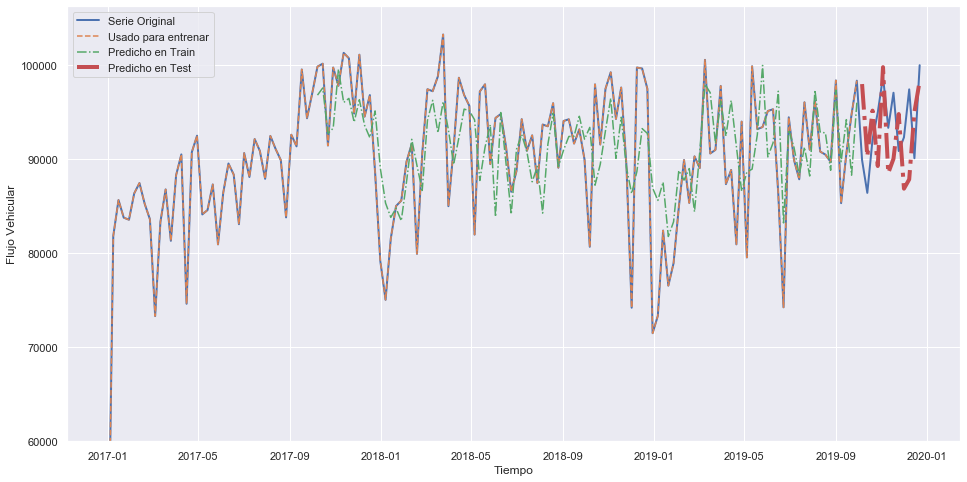

In [213]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 2, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.ylim(60000)
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Flujo Vehicular')
plt.show()

##### Primeras Conclusiones:
- Claramente sabemos que el modelo de **Regresión Lineal** no es el que mejor se adapta a nustro problema de **'Series de Tiempo'**, pero considero que es un buen comienzo para que sea nuestro **Benchmark** y tenerlo de referencia para más adelante.
- Los valores de los errores a mi entender parecen elevados (**RMSE Train: 5724.85 y RMSE Test: 5476.61** - se ve un pequeño overfitting).
- Esto lo podemos ver en el **gráfico** donde la predicción del último trimestre (linea roja), si bien sigue una tendencia, aún no se ajusta del todo.
- El próximo paso es modelar a través de **XGBoost** y comparar los resultados.

#### Modelo XGBoost

In [214]:
data_XGB = dataset_ML.copy()
data_XGB = data_XGB.reset_index()
data_XGB.head()

,fecha,cantidad_pasos
0,2017-01-01,43509.0
1,2017-01-02,87189.0
2,2017-01-03,90483.0
3,2017-01-04,93626.0
4,2017-01-05,97859.0


In [215]:
data_XGB_semanal = data_XGB.resample('W', on = 'fecha').mean()
data_XGB_semanal.head()

,cantidad_pasos
fecha,
2017-01-01,43509.000000
2017-01-08,81846.857143
2017-01-15,85667.714286
2017-01-22,83792.000000
2017-01-29,83573.285714


In [217]:
semanal_XGB = data_XGB_semanal.cantidad_pasos
semanal_XGB.head()

fecha
2017-01-01    43509.000000
2017-01-08    81846.857143
2017-01-15    85667.714286
2017-01-22    83792.000000
2017-01-29    83573.285714
Freq: W-SUN, Name: cantidad_pasos, dtype: float64

In [218]:
look_back = 1*40 # usamos los datos del útlimo año.

In [219]:
N = semanal_XGB.shape[0]
print(N)

158


In [220]:
N = semanal_XGB.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(117, 40) (117,)


In [221]:
for i in range(X.shape[0]):
    X[i,:] = semanal_XGB.iloc[i:i+look_back]
    y[i] = semanal_XGB.iloc[i+look_back]

In [222]:
N_train = 1*144 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 4*3 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape, length_total)

(104, 40) (104,)
(12, 40) (12,) 156


In [223]:
from xgboost import XGBRegressor
modelo_xgb = XGBRegressor(objective = 'reg:squarederror', random_state = 10)

In [224]:
modelo_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=10, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [225]:
y_train_pred_xgb = modelo_xgb.predict(X_train)
y_test_pred_xgb = modelo_xgb.predict(X_test)

In [226]:
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
print(f'RMSE Train: {rmse_train}')
print(f'RMSE Test: {rmse_test}')

RMSE Train: 741.1289306329904
RMSE Test: 5418.283714966613


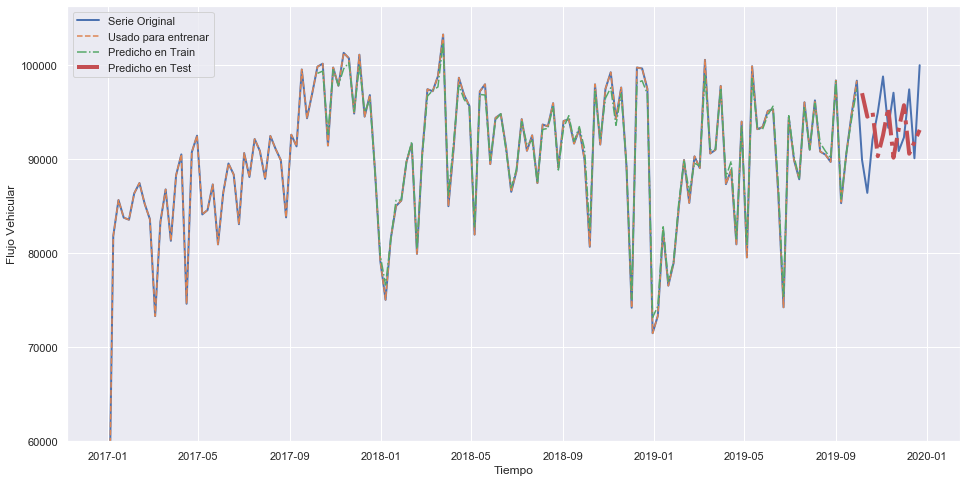

In [229]:
plt.figure(figsize=(16,8))
plt.plot(semanal_XGB.index[:length_total], semanal_XGB[:length_total],lw = 2, label = 'Serie Original')
plt.plot(semanal_XGB.index[:N_train + look_back], semanal_XGB[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(semanal_XGB.index[look_back: look_back + N_train], y_train_pred_xgb,'-.',label = 'Predicho en Train')
plt.plot(semanal_XGB.index[N_train+look_back: length_total], y_test_pred_xgb,'-.', lw = 4, label = 'Predicho en Test')
plt.ylim(60000)
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Flujo Vehicular')
plt.show()

#### Comentarios:
- Nuestro modelo mejoró sustancialmente, mejorando la performance en nuestros datos de **entrenamiento** (RMSE Train RL: 5724.85 vs RMSE Train XGBoost: 741.12)
- A pesar de la mejora, vemos que hay un gran **sobreajuste** en el modelo. (RMSE Train: 741.12 y RMSE Test: 5418.28).
  Este sobreajuste se puede resolver simplificando el modelo o agregando mas datos.
- Vamos a internatar mejorar los resultados del modelo mediante la optimización de Hiperparámetros.

#### Optimización de Hiperparámetros
Partimos de los mismos X_train y X_test del modelo anterior:

In [230]:
print(X_train)

[[ 43509.          81846.85714286  85667.71428571 ...  99559.28571429
   94366.28571429  97040.71428571]
 [ 81846.85714286  85667.71428571  83792.         ...  94366.28571429
   97040.71428571  99861.57142857]
 [ 85667.71428571  83792.          83573.28571429 ...  97040.71428571
   99861.57142857 100174.71428571]
 ...
 [ 99766.28571429  99660.          97498.28571429 ...  89723.28571429
   98392.71428571  85336.28571429]
 [ 99660.          97498.28571429  71499.85714286 ...  98392.71428571
   85336.28571429  90618.71428571]
 [ 97498.28571429  71499.85714286  73354.42857143 ...  85336.28571429
   90618.71428571  94816.        ]]


In [231]:
print(y_train)

[ 99861.57142857 100174.71428571  91468.85714286  99767.57142857
  97820.71428571 101327.28571429 100748.85714286  94869.85714286
 101132.          94538.28571429  96837.42857143  88631.14285714
  79177.          75052.28571429  81578.28571429  85025.57142857
  85606.42857143  89744.85714286  91645.28571429  79942.85714286
  90575.14285714  97457.42857143  97244.85714286  98840.
 103278.42857143  85012.14285714  91167.42857143  98681.28571429
  96850.71428571  95687.42857143  81990.57142857  97217.42857143
  97982.42857143  89492.71428571  94404.57142857  94817.14285714
  91351.42857143  86540.57142857  88747.5         94272.14285714
  90911.57142857  92551.14285714  87472.57142857  93700.57142857
  93512.28571429  95973.          89103.28571429  94082.28571429
  94258.14285714  91673.28571429  93190.          89964.14285714
  80693.85714286  97974.57142857  91572.42857143  97509.
  99259.57142857  94297.28571429  97638.42857143  89325.14285714
  74211.71428571  99766.28571429  99660. 

In [232]:
modelo_xgb = XGBRegressor(objective = 'reg:squarederror', random_state = 10)

La idea del **XGBoost**, es ir entrenando modelos simples y que cada uno vaya aprendiendo de los errores del anterior, por lo que, para seguir con la simplicidad de los modelos, no vamos a entrenar un XGBoost con profundidad mayor a 4 para y evitar la complejización del modelo.

In [233]:
from sklearn.model_selection import GridSearchCV

parametros = {
             "max_depth" : [1, 2, 3, 4],
             "n_estimators" : [100, 150, 200],
             } 

gs_xgb_gscv = GridSearchCV(estimator = modelo_xgb, param_grid = parametros,
                           scoring = 'neg_root_mean_squared_error')

In [234]:
gs_xgb_gscv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=10, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200]},
           

In [235]:
print(gs_xgb_gscv.best_params_)
print("Mejor score: " + str(abs(gs_xgb_gscv.best_score_)))

{'max_depth': 1, 'n_estimators': 100}
Mejor score: 8044.335781161541


In [236]:
df_xgb_gscv = XGBRegressor(objective = 'reg:squarederror',
                           random_state = 10, max_depth = gs_xgb_gscv.best_params_['max_depth'], 
                           n_estimators = gs_xgb_gscv.best_params_['n_estimators'])

In [237]:
df_xgb_gscv.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=1, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=10, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [238]:
y_train_pred_xgb_gscv = df_xgb_gscv.predict(X_train)
y_test_pred_xgb_gscv = df_xgb_gscv.predict(X_test)

In [239]:
y_train_pred_xgb_gscv

array([95850.   , 95065.06 , 94985.72 , 96685.9  , 97077.695, 95362.95 ,
       95503.06 , 90857.18 , 95116.234, 94199.836, 93951.76 , 89706.65 ,
       85084.77 , 86369.69 , 82039.92 , 87068.31 , 86149.164, 90460.64 ,
       92007.79 , 89070.   , 89691.45 , 93249.54 , 94285.33 , 93090.48 ,
       96283.19 , 90492.086, 93377.26 , 94386.945, 93993.24 , 96010.63 ,
       86389.54 , 92851.734, 92972.65 , 91923.47 , 91578.57 , 92707.73 ,
       90846.51 , 88977.26 , 88571.41 , 91009.18 , 92431.81 , 90416.766,
       88697.98 , 89872.7  , 93896.73 , 93809.02 , 88292.91 , 89702.16 ,
       93195.43 , 92788.16 , 93248.92 , 93372.09 , 91674.05 , 93359.875,
       94435.945, 93428.414, 93335.86 , 91789.67 , 93479.84 , 90167.13 ,
       84592.71 , 91693.98 , 93777.836, 92743.94 , 82513.58 , 81735.695,
       87137.484, 83685.29 , 81133.17 , 86617.71 , 89658.45 , 89009.57 ,
       89575.06 , 88496.85 , 92967.11 , 93030.01 , 91793.37 , 94373.77 ,
       91730.23 , 91004.73 , 86360.59 , 90930.13 , 

In [240]:
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb_gscv))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb_gscv))
print(f'RMSE Train: {rmse_train}')
print(f'RMSE Test: {rmse_test}')

RMSE Train: 4377.0317186724715
RMSE Test: 4899.494848488125


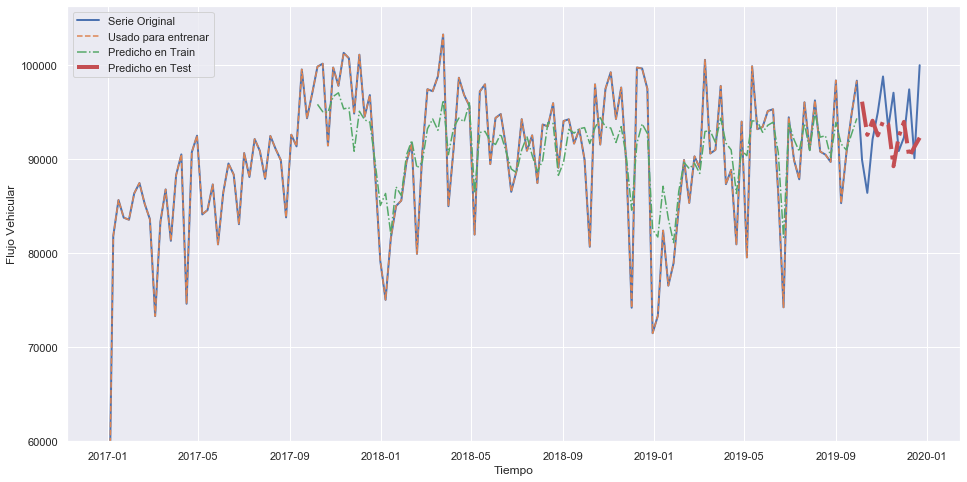

In [242]:
plt.figure(figsize=(16,8))
plt.plot(semanal_XGB.index[:length_total], semanal_XGB[:length_total],lw = 2, label = 'Serie Original')
plt.plot(semanal_XGB.index[:N_train + look_back], semanal_XGB[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(semanal_XGB.index[look_back: look_back + N_train], y_train_pred_xgb_gscv,'-.',label = 'Predicho en Train')
plt.plot(semanal_XGB.index[N_train+look_back: length_total], y_test_pred_xgb_gscv,'-.', lw = 4, label = 'Predicho en Test')
plt.ylim(60000)
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Flujo Vehicular')
plt.show()

Como podemos notar, al utilizar **Gridsearch** para optimizar nuestros hiperparámetros, nos simplificó el modelo tomando como 'max_depht'= 1 es vez de = 3.
Por lo que el problema del sobreajuste se solucionó, y la performance de este modelo sigue siendo mejor que el de Regresión Lineal tomado como **Benchmarck**.

##### ¿Qué variables fueron relevantes para el modelo para hacer una predicción?

In [243]:
df_xgb_gscv.feature_importances_

array([0.05065577, 0.05168186, 0.        , 0.        , 0.04512216,
       0.        , 0.        , 0.03112513, 0.        , 0.03103377,
       0.        , 0.        , 0.        , 0.        , 0.02926587,
       0.05474758, 0.03297326, 0.03128872, 0.        , 0.03356847,
       0.0257504 , 0.0324228 , 0.02097338, 0.        , 0.        ,
       0.07038089, 0.04013398, 0.        , 0.        , 0.07862183,
       0.03606769, 0.02742798, 0.04548997, 0.        , 0.05749878,
       0.        , 0.07193465, 0.05037661, 0.        , 0.05145843],
      dtype=float32)

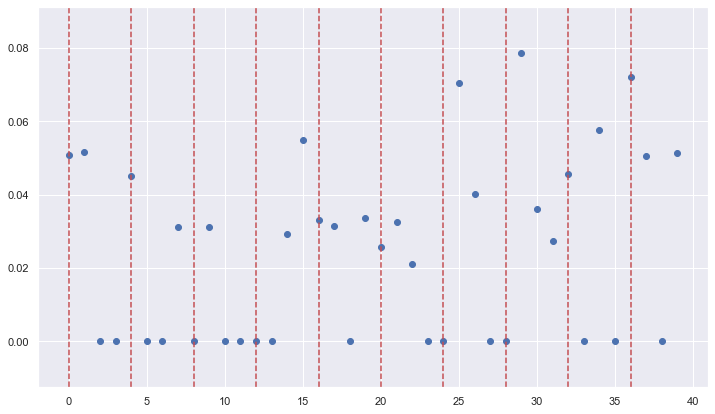

In [244]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(df_xgb_gscv.feature_importances_.size),df_xgb_gscv.feature_importances_)
for x in np.arange(10)*4:
    plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

Vemos que los features como mayor importancia y peso para la predicción del modelo son los ligados a las **épocas vacacionales**. 
- Últimas dos semanas de Diciembre 2018 (Moviminto de la **1er Quincena**)
- Últimas semanas de Marzo y fines de Mayo (**Comiezo de las Clases y Semana Santa en el medio de Abril**).
- Segunda semana de Julio hasta Segunda de Agosto (**Vacaciones de Invierno**)
- y las últimas semanas **más cercanas** al período de Análisis.

Este resultado era claramente esperable, dado que donde se producen los mayores cambios de flujo vehicular son en los fines de semana largos con fines turisticos, vacaciones de invierno y de verano y épocas escolares.

### Predicción Tráfico Vehicular Año 2020

Para predecir el 2020, vamos a utilizar nuestro modelo **XGBoost** ya optimizado.
Vamos a empezar creando nuestros datos de entrenamiento y luego mediante la estrategia **Multi-Step prediction**, vamos a ir prediciendo las 52 semanas del 2020.

Para ser claros, vamos a ir prediciendo de a una las semanas, incoporando la última predicha como datos para predecir la siguiente.
Este método puede llegar a tener la desventaja, de que si el modelo no es preciso, vamos a ir arrastrando errores en cada predicción.

In [245]:
start_date = '2019-03-31'
end_date = '2019-12-29' #40 semanas que utilizamos en la parte anterior.

arraypredict = semanal[(semanal.index >= start_date) & (semanal.index <= end_date)].values
arraypredict

array([ 97808.14285714,  87357.28571429,  88870.14285714,  80954.14285714,
        94014.85714286,  79560.85714286,  99901.57142857,  93207.14285714,
        93435.42857143,  95140.42857143,  95326.28571429,  86321.28571429,
        74253.85714286,  94470.        ,  89938.28571429,  87875.14285714,
        96070.14285714,  91022.14285714,  96267.28571429,  90822.71428571,
        90499.42857143,  89723.28571429,  98392.71428571,  85336.28571429,
        90618.71428571,  94816.        ,  98365.85714286,  89918.85714286,
        86431.28571429,  92113.        ,  94987.57142857,  98812.14285714,
        93352.14285714,  97082.71428571,  90878.71428571,  92336.14285714,
        97441.71428571,  90113.        , 100012.71428571,  72683.57142857])

In [246]:
arraypredict = arraypredict.reshape(1,-1)
arraypredict

array([[ 97808.14285714,  87357.28571429,  88870.14285714,
         80954.14285714,  94014.85714286,  79560.85714286,
         99901.57142857,  93207.14285714,  93435.42857143,
         95140.42857143,  95326.28571429,  86321.28571429,
         74253.85714286,  94470.        ,  89938.28571429,
         87875.14285714,  96070.14285714,  91022.14285714,
         96267.28571429,  90822.71428571,  90499.42857143,
         89723.28571429,  98392.71428571,  85336.28571429,
         90618.71428571,  94816.        ,  98365.85714286,
         89918.85714286,  86431.28571429,  92113.        ,
         94987.57142857,  98812.14285714,  93352.14285714,
         97082.71428571,  90878.71428571,  92336.14285714,
         97441.71428571,  90113.        , 100012.71428571,
         72683.57142857]])

In [247]:
i = 0
lista = []
    
while i <=51:
    val_predict = df_xgb_gscv.predict(arraypredict)
    new_arraypredict = arraypredict
    new_arraypredict = np.append(new_arraypredict, val_predict)  #agregar la predicciónal último elemento
    new_arraypredict = np.delete(new_arraypredict, 0)            #eliminar el primer elemento
    new_arraypredict = new_arraypredict.reshape(1,-1)
    lista.append(val_predict.tolist())
    arraypredict = new_arraypredict
    i = i+1 
print(list)     

<class 'list'>


In [248]:
resultados_2020 = np.asarray(lista)

In [249]:
resultados_2020.shape

(52, 1)

In [250]:
pd.date_range('2020-01','2021-01', freq='W')
data_2020=pd.DataFrame(pd.date_range('2020-01','2021-01', freq='W'))
data_2020

,0
0,2020-01-05
1,2020-01-12
2,2020-01-19
3,2020-01-26
4,2020-02-02
5,2020-02-09
6,2020-02-16
7,2020-02-23
8,2020-03-01
9,2020-03-08


In [251]:
data_2020['cant_pasos']=resultados_2020
data_2020.head()

,0,cant_pasos
0,2020-01-05,86428.875000
1,2020-01-12,91249.054688
2,2020-01-19,88958.578125
3,2020-01-26,91964.734375
4,2020-02-02,89575.335938


In [252]:
data_2020.rename(columns={0: 'fecha'}, inplace=True)
data_2020.head()

,fecha,cant_pasos
0,2020-01-05,86428.875000
1,2020-01-12,91249.054688
2,2020-01-19,88958.578125
3,2020-01-26,91964.734375
4,2020-02-02,89575.335938


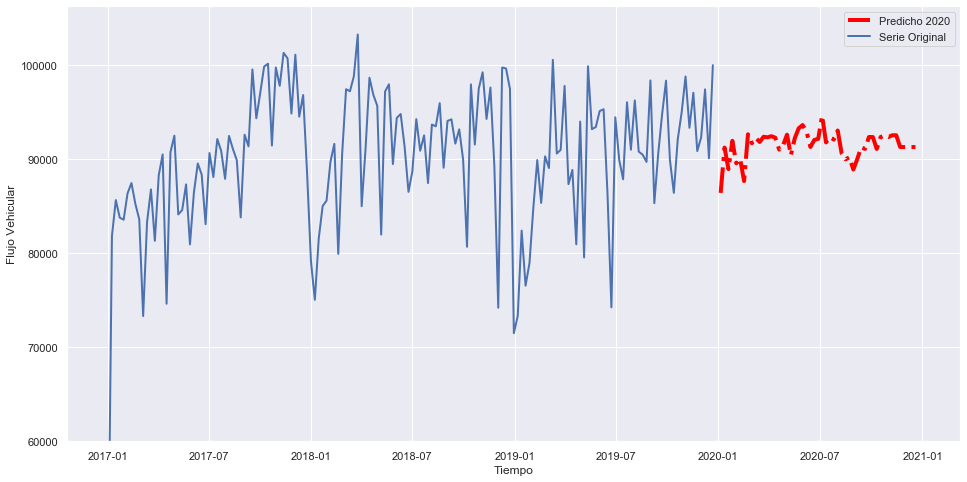

In [255]:
plt.figure(figsize=(16,8))
plt.plot(data_2020.fecha, data_2020.cant_pasos,'-.', lw = 4, color = 'red', label = 'Predicho 2020')
plt.plot(semanal_XGB.index[:length_total], semanal_XGB[:length_total],lw = 2, label = 'Serie Original')
plt.ylim(60000)
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Flujo Vehicular')
plt.show()

#### Conclusiones:

- Observando tanto los valores predichos como su representación en el Gráfico, podemos notar que los valores tienen sentido y que se mantienen los valores promedios de los últimos años (cumpliendo uno de los principios de las Series **“Los modelos de predicción se basan en que el futuro va a comportarse como el pasado”**.
- Seguramente haya otra mejor forma de forcastear los siguientes valores, como utilizando SARIMAX, Prophet o incluso Redes Neuronales. Alguno de estos métodos los vamos a utilizar en el próximo proyecto.

### Parte C - Investigación

1.	¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?

Con las herramintas obtenidas a lo largo del curso, quizas podriamos decir de aplicar un "One-hot encoding" a las variables categóricas e incorporarlas al modelo.

Como la incorporaría? Acá nos lleva a la parte de la investigación. 
Por lo que he leido, una de las formas sería quizas mediante la librería **Prophet**, donde podriamos utilizar el one-hot encode o label encode e incorporarlo al modelo usando el método **add_regressor()**.

También podriamos por ejemplo con **add_regressor**, incorporar un efecto adicional en los Viernes, que sabemos que es el día de mayor tráfico.

Fuente: https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors

Notebook ejemplo: https://nbviewer.jupyter.org/github/nicolasfauchereau/Auckland_Cycling/blob/master/notebooks/Auckland_cycling_and_weather.ipynb

Al no haber trabajado con **Prophet** en este proyecto, vamos a dejarlo como una posible mejora y pendiente para el 4to proyecto.

2.	¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?

Como los modelos fueron armados en base a las formas de pago tanto en Efectivo como Telepase, vamos a utilizar ambas también para comparar las distintas estaciones de peaje.

Además, para un correcto análisis y visualización, vamos a unificar las estaciones **"Alberti" con "Alberdi" y "Dellepiane" con "Dellepiane Centro" y "Dellepiane Liniers".**

In [150]:
dataset_C = pd.concat([data_2019, data_2018, data_2017])

dataset_C = dataset_C.loc[((dataset_C["forma_pago"] == "EFECTIVO") |
                (dataset_C["forma_pago"] == "TELEPASE"))]

dataset_C.drop(columns = ['periodo','hora_inicio'], inplace = True)

dataset_C.head(1)

,fecha,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
1,2019-01-01,1,Martes,Alberti,Centro,Liviano,TELEPASE,6


In [151]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_C['fecha2'] = pd.to_datetime(dataset_C.fecha) + pd.to_timedelta(dataset_C.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_C.drop(columns=['fecha','hora_fin'], inplace = True)

dataset_C.head()

,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha2
1,Martes,Alberti,Centro,Liviano,TELEPASE,6,2019-01-01 01:00:00
3,Martes,Alberti,Provincia,Liviano,TELEPASE,18,2019-01-01 01:00:00
4,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16,2019-01-01 01:00:00
7,Martes,Avellaneda,Centro,Liviano,TELEPASE,159,2019-01-01 01:00:00
8,Martes,Avellaneda,Centro,Pesado,TELEPASE,5,2019-01-01 01:00:00


In [152]:
#Corregimos el nombre de fecha2 a fecha
dataset_C.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset_C.head()

,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
1,Martes,Alberti,Centro,Liviano,TELEPASE,6,2019-01-01 01:00:00
3,Martes,Alberti,Provincia,Liviano,TELEPASE,18,2019-01-01 01:00:00
4,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16,2019-01-01 01:00:00
7,Martes,Avellaneda,Centro,Liviano,TELEPASE,159,2019-01-01 01:00:00
8,Martes,Avellaneda,Centro,Pesado,TELEPASE,5,2019-01-01 01:00:00


In [153]:
#Reordenamos el dataset por fecha
dataset_C.sort_values('fecha', inplace = True)
dataset_C.reset_index(drop=True, inplace = True)
dataset_C

,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,Domingo,Dellepiane Liniers,Provincia,Pesado,TELEPASE,4,2017-01-01 00:00:00
1,Domingo,Avellaneda,Provincia,Pesado,TELEPASE,5,2017-01-01 00:00:00
2,Domingo,Avellaneda,Provincia,Pesado,EFECTIVO,7,2017-01-01 00:00:00
3,Domingo,Sarmiento,Provincia,Liviano,TELEPASE,17,2017-01-01 00:00:00
4,Domingo,Avellaneda,Provincia,Pesado,TELEPASE,3,2017-01-01 00:00:00
...,...,...,...,...,...,...,...
2048032,Martes,PDB,Provincia,Pesado,TELEPASE,3,2019-12-31 23:00:00
2048033,Martes,Retiro,Provincia,Liviano,EFECTIVO,5,2019-12-31 23:00:00
2048034,Martes,Retiro,Provincia,Liviano,TELEPASE,4,2019-12-31 23:00:00
2048035,Martes,Sarmiento,Provincia,Liviano,TELEPASE,10,2019-12-31 23:00:00


In [154]:
dataset_C.estacion = dataset_C.estacion.replace({"Alberti": 'Alberdi', "Dellepiane Liniers": 'Dellepiane',
                                                 'Dellepiane Centro': 'Dellepiane'})
dataset_C

,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,Domingo,Dellepiane,Provincia,Pesado,TELEPASE,4,2017-01-01 00:00:00
1,Domingo,Avellaneda,Provincia,Pesado,TELEPASE,5,2017-01-01 00:00:00
2,Domingo,Avellaneda,Provincia,Pesado,EFECTIVO,7,2017-01-01 00:00:00
3,Domingo,Sarmiento,Provincia,Liviano,TELEPASE,17,2017-01-01 00:00:00
4,Domingo,Avellaneda,Provincia,Pesado,TELEPASE,3,2017-01-01 00:00:00
...,...,...,...,...,...,...,...
2048032,Martes,PDB,Provincia,Pesado,TELEPASE,3,2019-12-31 23:00:00
2048033,Martes,Retiro,Provincia,Liviano,EFECTIVO,5,2019-12-31 23:00:00
2048034,Martes,Retiro,Provincia,Liviano,TELEPASE,4,2019-12-31 23:00:00
2048035,Martes,Sarmiento,Provincia,Liviano,TELEPASE,10,2019-12-31 23:00:00


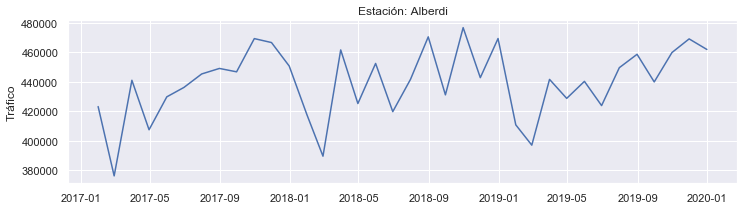

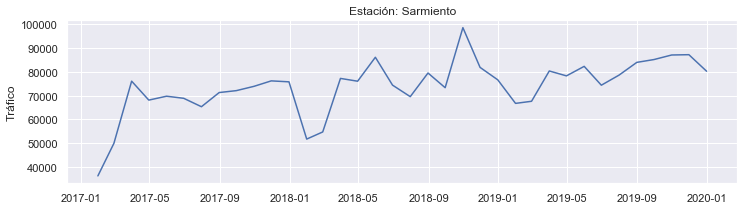

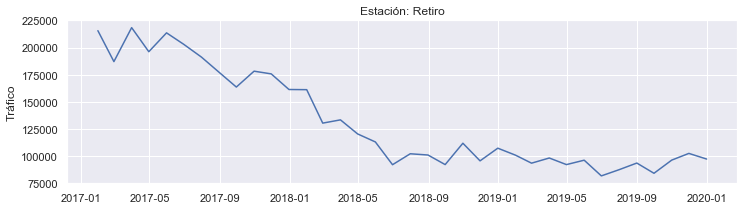

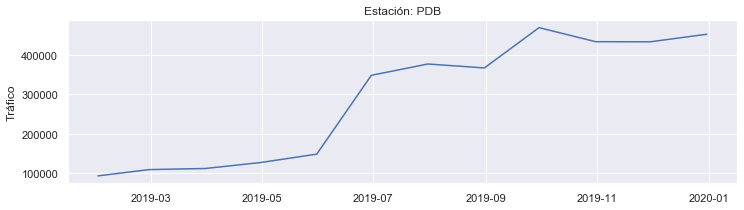

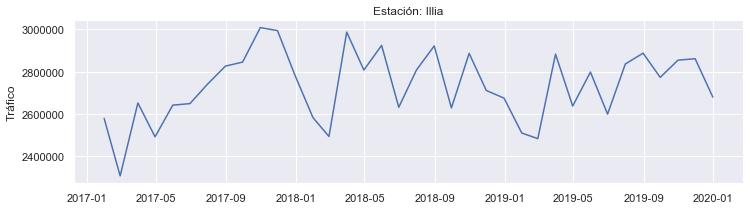

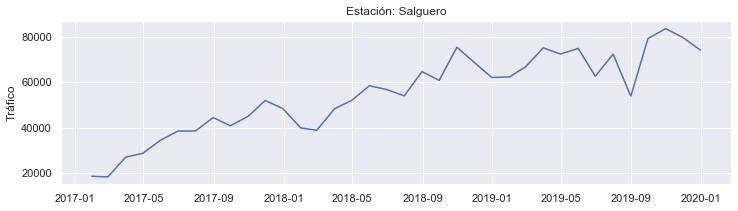

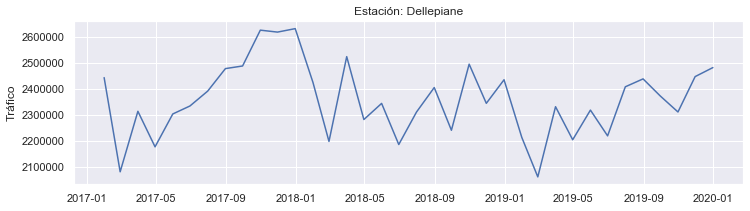

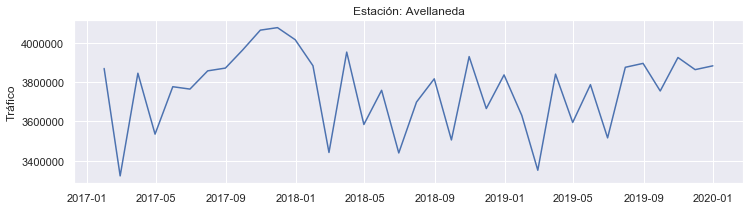

In [155]:
estaciones = []

for i in dataset_C['estacion']:
    estaciones.append(i)
    
for i in list(set(estaciones)):
    dataset_i = dataset_C.copy()    
    dataset_i = dataset_i.loc[((dataset_i["estacion"] == i))]

    dataset_i = dataset_i.resample('M', on = 'fecha').sum()
    
    plt.figure(figsize = (12,3))
    
    plt.subplot(1,1,1)
    plt.plot(dataset_i.index, dataset_i.cantidad_pasos)
    plt.title('Estación: ' + str(i))
    #plt.xlabel('Tiempo')
    plt.ylabel('Tráfico')
    plt.show()

Si observamos los distintos gráficos, las estaciones de **Avellaneda, Alberdi, Sarmiento, Dellepiane e Illia** se comportan de manera similar.
Se registran caidas marcadas en **Marzo** de los 3 años analizados, volviendo a alcanzar los máximos niveles en meses posteriores. Esto se da en parte por el comienzo de las Clases Escolares.

Con respecto a la estación de **Salguero**, fue inaugurada en el año 2015 con una vía exclusiva para clientes del peaje automático (AUPASS / Pase / Telepeaje / SIGA), en donde no habrá cabinas para el pago ni barreras, sino que se instalará una modalidad tipo Free Flow, mediante la cual los vehículos no se detendrán. El pago se realizará automáticamente a través del sistema.

Quienes no estén adheridos al sistema, como alternativa podrían ingresar por otro acceso (Av. Costanera Rafael Obligado y Av. Castillo o subir en Av. Del Libertador y Suipacha.)

Esto se relaciona con la curva de crecimiento de la forma de pago TELEPASE y por supuesto la tendencia positiva que presenta esta estacion de peaje en cuanto al tráfico.

Nota: https://www.buenosaires.gob.ar/noticias/los-nuevos-accesos-de-la-autopista-illia

La AU ILLIA que con tiene a la estacion de peaje de **Retiro** entre años 2017 a 2019, se ve afectada por los aumentos generales en los costos de transporte y los pagos de las tarifas. 
Al mismo tiempo las mejoras en la autopista y creacion de nuevos desvios (creacion de la obra **Paseo del Bajo** para descongestionar su trafico que generó una merma en el flujo.

"*Por el corredor circularán el tránsito pesado y los micros de larga distancia, que podrán bajar desde la autopista Buenos Aires - La Plata, cruzar la zona del centro sin semáforos e ingresar de forma directa al Puerto de Buenos Aires y la Terminal de Ómnibus de Retiro. De ese modo, se descongestionan las avenidas Alicia Moreau de Justo, Madero y Huergo para el tránsito liviano y los colectivos urbanos."*


Nota paseo del Bajo: https://www.buenosaires.gob.ar/noticias/un-compromiso-que-crece-la-obra-del-paseo-del-bajo)

3.	¿Hay algo que te gustaría investigar o probar?

En cuanto **investigar** me gustaria saber a que se deben las fechas que tienen flujo vehicular 0 (cero), algo que me parece algo raro ya que ya hicimos el chequeo de que nuestro dataset estuviera completo y que estaria bueno entenderlo.

En cuanto a **probar**, me gustaría implementar ARIMA y la libreria Prophet en busqueda de un mejor modelo y una predicción mas preciso con respecto al 2020. Esto lo voy a tratar de implementar en el 4to Proyecto.



In [259]:
data_VA = dataset.copy()

In [260]:
diario_VA = data_VA.resample('D', on = 'fecha').sum()
diario_VA.head()

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


In [262]:
mask2 = diario_VA[diario_VA.cantidad_pasos < 20000]

mask2

,cantidad_pasos
fecha,
2017-04-06,40
2018-06-25,0
2018-09-25,0
2018-11-29,19728
2018-11-30,0
2018-12-01,350
2019-01-13,18076
2019-05-29,0



- **6 de Abril de 2017**: se vio afectada por un paro a nivel nacional en la Panamericana.

    Nota: (https://www.lanacion.com.ar/politica/paro-del-6-de-abril-general-cgt-servicios-nid2005425/)
    

- **25 de Junio de 2018  y 25 de Septiembre de 2018** paros de la CGT.

    Nota 25 de Junio: (https://www.infobae.com/diarios/2018/06/25/clarin-lunes-25-de-junio-de-2018/)

    Nota 25 Septiembre: (https://www.infobae.com/politica/2018/08/29/la-cgt-anuncio-un-paro-general-para-el-25-de-septiembre/)
       

- **Entre el 30 de Noviembre y 1 de Diciembre de 2018** se registran pocas entradas: AU Illia estuvo cerrada desde el Viernes 30 de Noviembre al Sabado 1 de Diciembre (22:00 hrs inclusive). El motivo la **Cumbre G20**, la cual hizo cerrar muchos accesos y AU.

    Nota: (https://www.buenosaires.gob.ar/jefedegobierno/xiii-cumbre-lideres-g20/cumbre-del-g20-viernes-30-de-noviembre)


- **29 de Mayo de 2019**: paro general de la CGT. 
   
   Nota:(https://www.lanacion.com.ar/politica/paro-general-cgt-29-mayo-transporte-banco-nid2251730#:~:text=El%20mi%C3%A9rcoles%2029%20de%20mayo,Transporte%20public%C3%B3%3A%20%22Nuestro%20sec.) 

**Mi GitHub: https://github.com/jmbedini**

**Repositorio donde se encuentra el proyecto: https://github.com/jmbedini/proyect_3_TS**